In [1]:
if (!require('igraph')){ 
    install.packages('igraph')
}
library('igraph')
set.seed(1)

Loading required package: igraph
Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
fb_graph <- read.graph("facebook_combined.txt", format="edgelist", directed=FALSE)

In [3]:
create_core_node_graph <- function(id, graph){
    old_node_names <- c(id, neighbors(graph,id))
    core_node_g <- induced_subgraph(graph, old_node_names)
    V(core_node_g)$name <- sort(old_node_names) 
    core_node_g$core_node_id <- id
    core_node_g$core_node_pos <- which(V(core_node_g)$name==id)
    return(core_node_g)
}

#get induced graph by core node
core_node_1 <- create_core_node_graph(id = 1,graph = fb_graph )  
core_node_108 <- create_core_node_graph(id = 108,graph = fb_graph )  
core_node_349 <- create_core_node_graph(id = 349,graph = fb_graph )  
core_node_484 <- create_core_node_graph(id = 484,graph = fb_graph )  
core_node_1087 <- create_core_node_graph(id = 1087,graph = fb_graph )  

In [4]:
V(core_node_1087)

+ 206/206 vertices, named, from 75cd1f6:
  [1] 108  484  597  607  638  642  917  918  926  935  947  948  953  954  961 
 [16] 967  979  981  984  994  1004 1007 1023 1025 1030 1033 1050 1055 1060 1061
 [31] 1069 1076 1077 1079 1080 1081 1084 1087 1092 1102 1113 1118 1124 1126 1127
 [46] 1129 1131 1133 1136 1144 1147 1150 1154 1157 1164 1165 1173 1176 1181 1185
 [61] 1186 1193 1199 1200 1202 1208 1212 1215 1223 1236 1239 1244 1251 1256 1257
 [76] 1268 1272 1274 1286 1289 1290 1292 1299 1303 1313 1319 1330 1331 1336 1340
 [91] 1345 1352 1353 1359 1368 1371 1376 1377 1378 1391 1392 1400 1403 1417 1419
[106] 1424 1428 1430 1432 1437 1448 1450 1457 1458 1464 1468 1472 1481 1484 1489
[121] 1510 1517 1518 1523 1540 1548 1557 1558 1564 1566 1571 1572 1590 1599 1601
[136] 1604 1605 1606 1609 1611 1614 1618 1620 1621 1622 1623 1633 1644 1653 1660
+ ... omitted several vertices

In [5]:
embeddedness_of_node <- function(core_node_g, node_non_core)
{
    return(degree(core_node_g,node_non_core) - 1) # -1 since we do not count core node
}

In [6]:
#LOCATION OF CORE NODE in old_nodes
print(core_node_1$core_node_pos)
print(core_node_108$core_node_pos)
print(core_node_349$core_node_pos)
print(core_node_484$core_node_pos)
print(core_node_1087$core_node_pos)

[1] 1
[1] 3
[1] 5
[1] 41
[1] 38


In [7]:
embeddedness_list <- function(core_node_g){
    #Discard core node from the list
    nodes_wo_core = V(core_node_g)[-core_node_g$core_node_pos]
    return(embeddedness_of_node(core_node_g,nodes_wo_core))
}

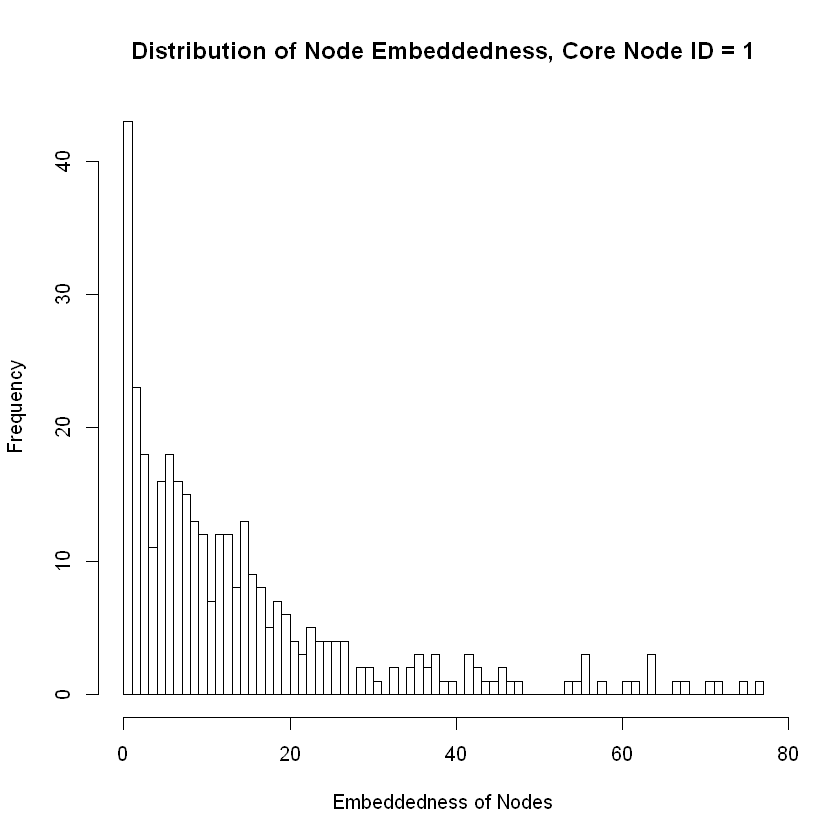

In [8]:
embeddedness_1 <- embeddedness_list(core_node_g = core_node_1)
hist(embeddedness_1, breaks = 100, main="Distribution of Node Embeddedness, Core Node ID = 1", xlab="Embeddedness of Nodes", ylab="Frequency")

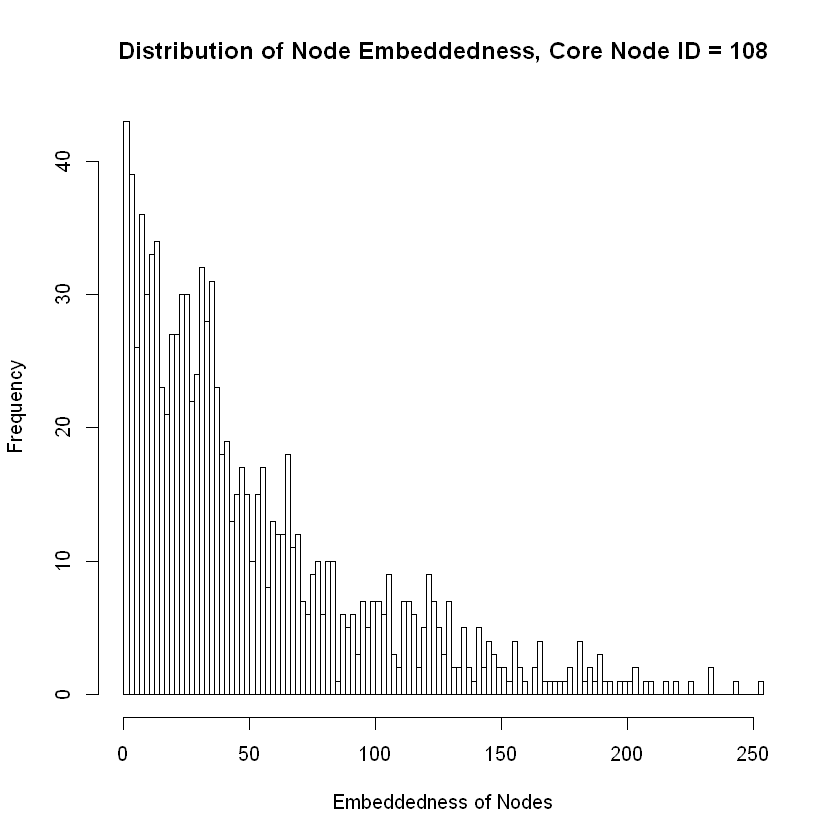

In [9]:
embeddedness_108 <- embeddedness_list(core_node_g = core_node_108)
hist(embeddedness_108, breaks = 100, main="Distribution of Node Embeddedness, Core Node ID = 108", xlab="Embeddedness of Nodes", ylab="Frequency")

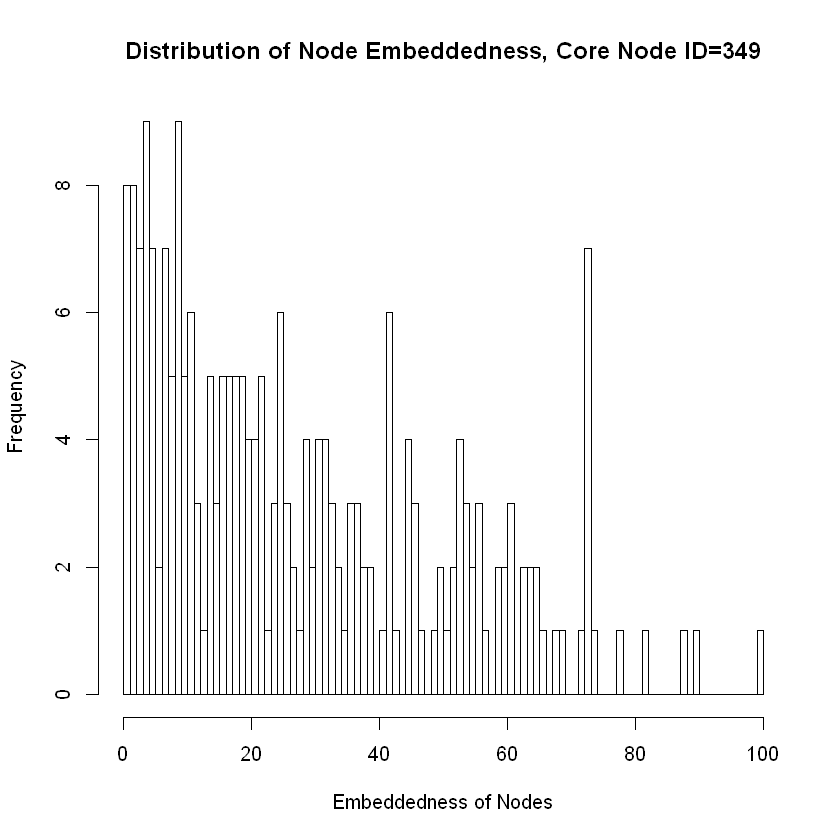

In [10]:
embeddedness_349 <- embeddedness_list(core_node_g = core_node_349)
hist(embeddedness_349,breaks = 100, main="Distribution of Node Embeddedness, Core Node ID=349", xlab="Embeddedness of Nodes", ylab="Frequency")

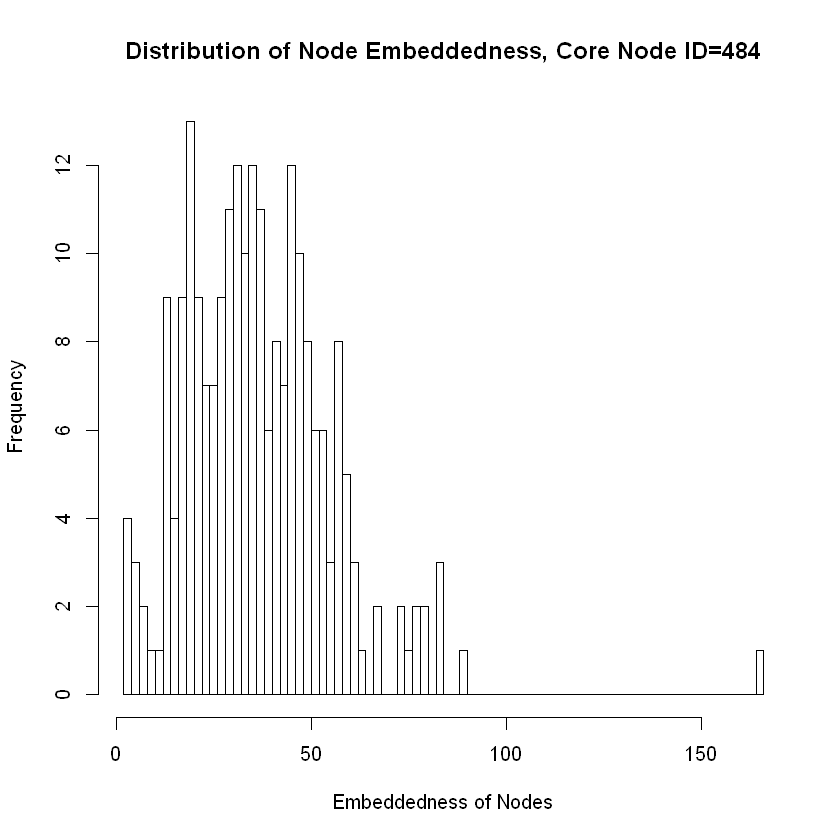

In [11]:
embeddedness_484 <- embeddedness_list(core_node_g = core_node_484)
hist(embeddedness_484,breaks = 100, main="Distribution of Node Embeddedness, Core Node ID=484", xlab="Embeddedness of Nodes", ylab="Frequency")

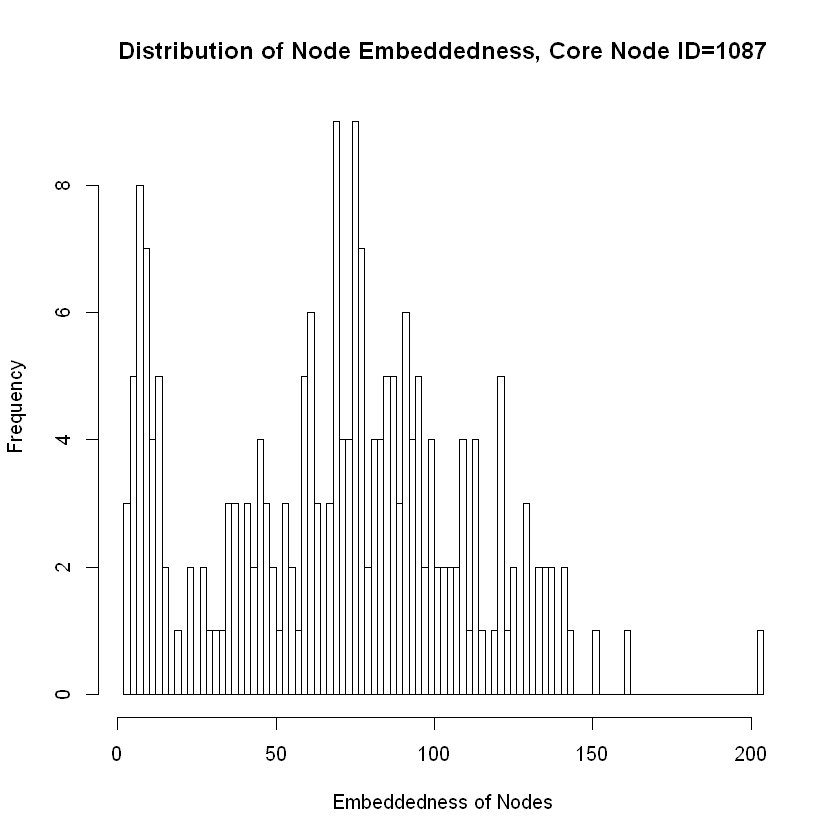

In [12]:
embeddedness_1087 <- embeddedness_list(core_node_g = core_node_1087)
hist(embeddedness_1087,breaks = 100, main="Distribution of Node Embeddedness, Core Node ID=1087", xlab="Embeddedness of Nodes", ylab="Frequency")

In [13]:
dispersion_of_node <-function(core_node_g, node) {
 
  # Get mutual friends of node and core_node
  core_node = V(core_node_g)[core_node_g$core_node_pos]
  mutual_friends <- intersection(neighbors(core_node_g, node), neighbors(core_node_g, core_node))
  names_friends <- as.character(mutual_friends$name)  
    
  # Remove node and core_node from the graph
  s_graph <- delete_vertices(core_node_g, c(node,core_node))
    
  # Compute shortest path lengths between mutual friends
  dist_matrix <- distances(s_graph, v = V(s_graph)[names_friends], to = V(s_graph)[names_friends] )
  
  dispersion <- sum(dist_matrix) / 2 # since each pair counted twice
  
}

In [14]:
dispersion_list <- function(core_node_g){
    #Discard core node from the list
    nodes_wo_core = V(core_node_g)[-core_node_g$core_node_pos]
    dispersions = c()
    for (i in 1: length(nodes_wo_core)){
        disp_node = dispersion_of_node(core_node_g,nodes_wo_core[i])
        if(disp_node != Inf){
            dispersions = append(dispersions,disp_node)
        }
        else{
            dispersions = append(dispersions,NaN)
        }
    }
    return(dispersions)
}

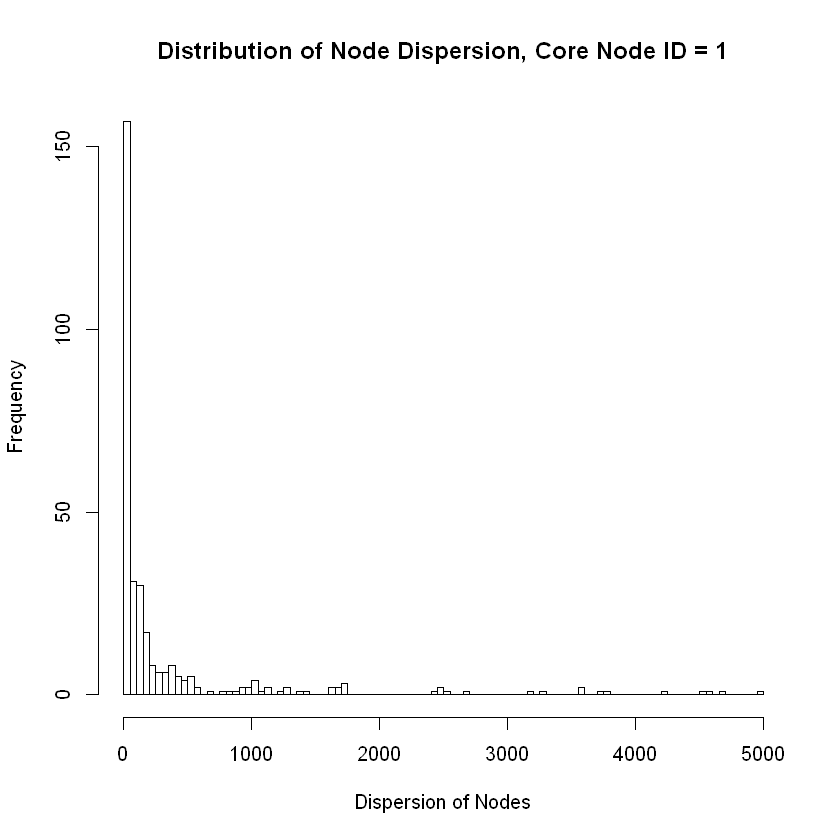

In [15]:
dispersion_1 <- dispersion_list(core_node_g = core_node_1)
hist(dispersion_1,breaks = 100, main="Distribution of Node Dispersion, Core Node ID = 1", xlab="Dispersion of Nodes", ylab="Frequency")

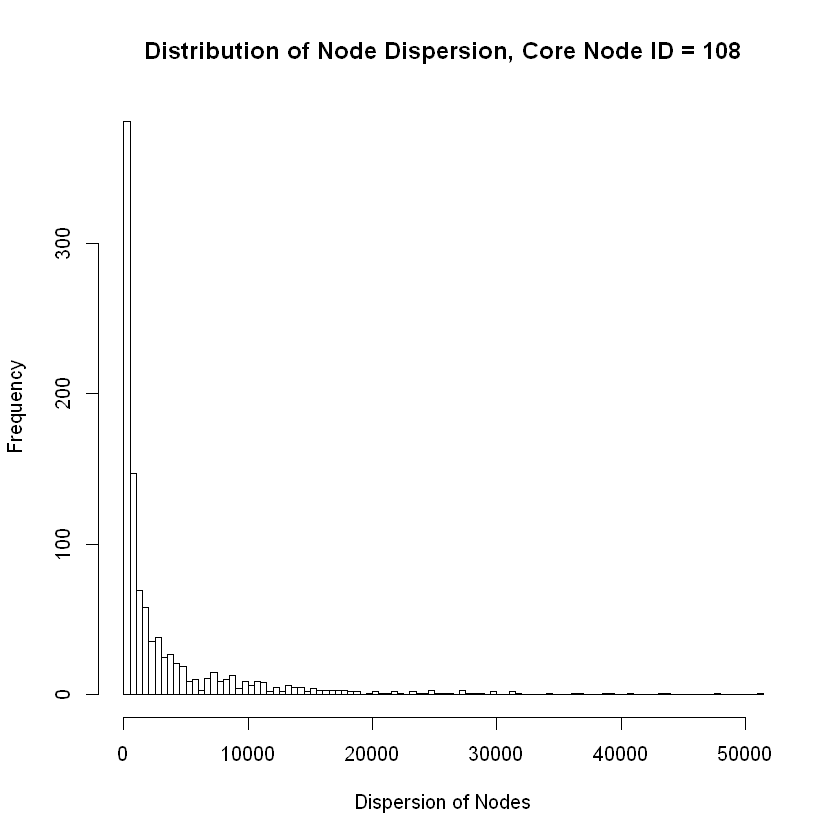

In [16]:
dispersion_108 <- dispersion_list(core_node_g = core_node_108)
hist(dispersion_108,breaks = 100, main="Distribution of Node Dispersion, Core Node ID = 108", xlab="Dispersion of Nodes", ylab="Frequency")

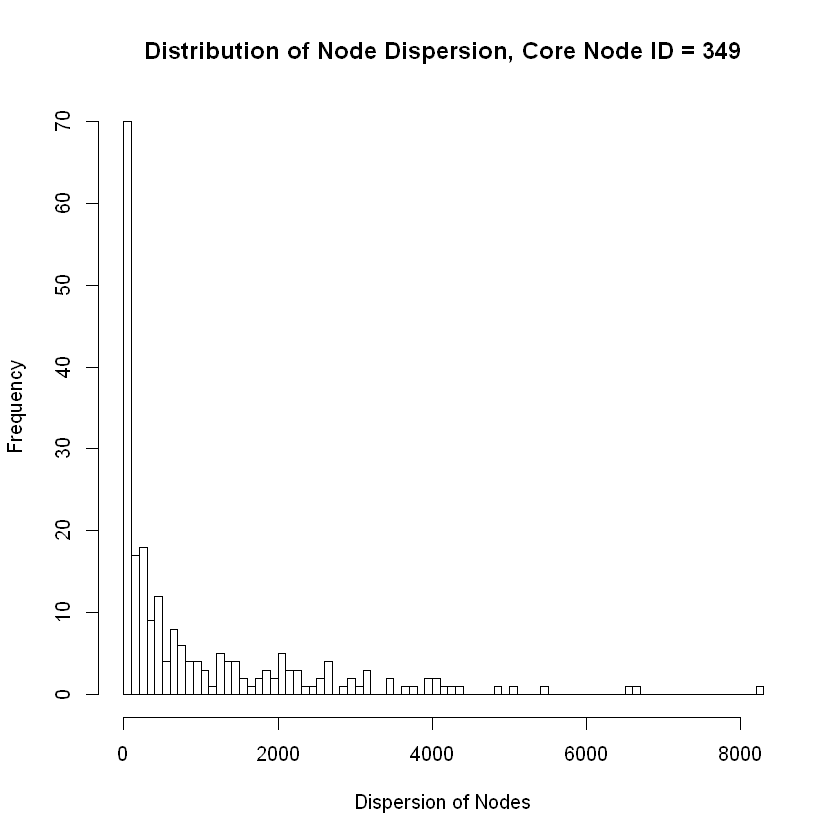

In [17]:
dispersion_349 <- dispersion_list(core_node_g = core_node_349)
hist(dispersion_349,breaks = 100, main="Distribution of Node Dispersion, Core Node ID = 349", xlab="Dispersion of Nodes", ylab="Frequency")

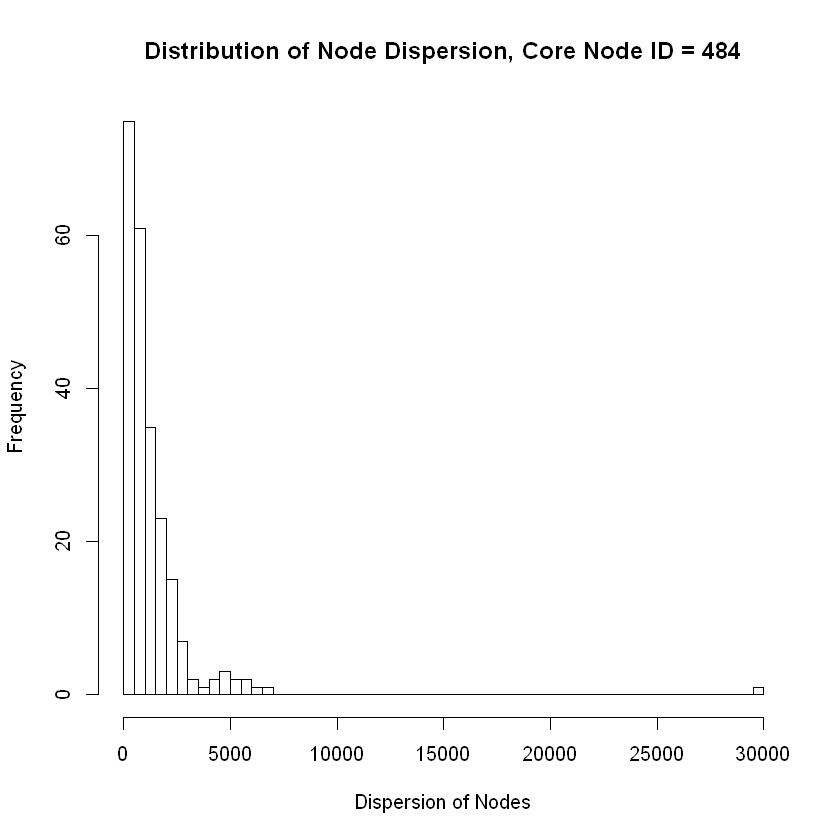

In [18]:
dispersion_484 <- dispersion_list(core_node_g = core_node_484)
hist(dispersion_484,breaks = 100, main="Distribution of Node Dispersion, Core Node ID = 484", xlab="Dispersion of Nodes", ylab="Frequency")

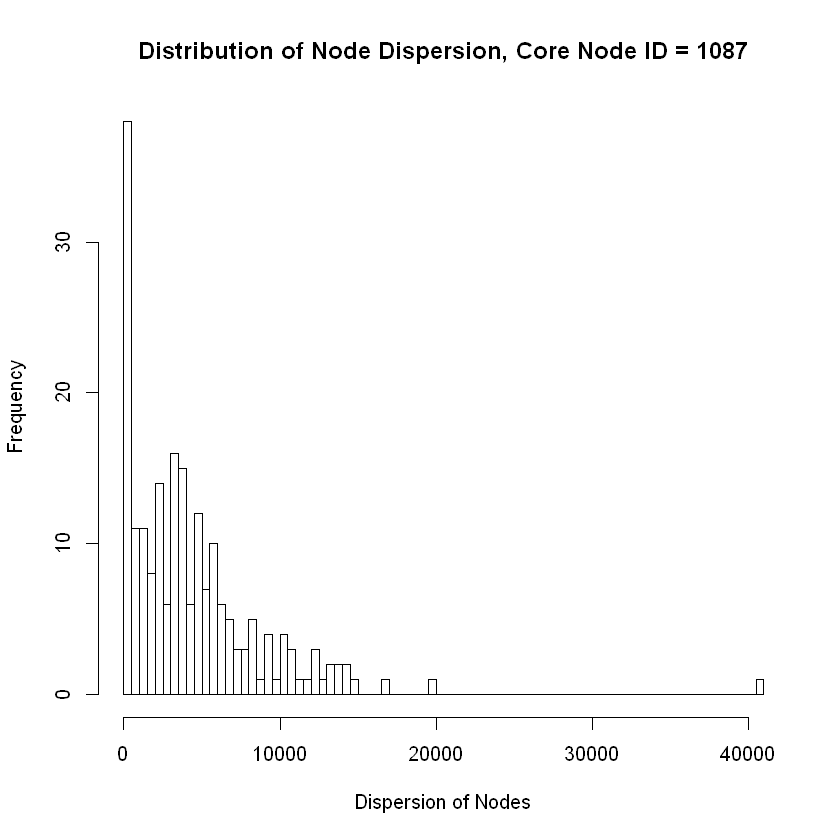

In [19]:
dispersion_1087 <- dispersion_list(core_node_g = core_node_1087)
hist(dispersion_1087,breaks = 100, main="Distribution of Node Dispersion, Core Node ID = 1087", xlab="Dispersion of Nodes", ylab="Frequency")

In [20]:
com_1 = fastgreedy.community(core_node_1)
com_108 = fastgreedy.community(core_node_108)
com_349 = fastgreedy.community(core_node_349)
com_484 = fastgreedy.community(core_node_484)
com_1087 = fastgreedy.community(core_node_1087)

In [21]:
max_dispersion_vertex <- function(core_node_g, dispersion_l){
    # input is dispersion_l not dispersion_1
    nodes_wo_core = V(core_node_g)[-core_node_g$core_node_pos]
    return(nodes_wo_core[which.max(dispersion_l)])
}

In [22]:
max_disp_vertex_1 = max_dispersion_vertex(core_node_1,dispersion_1)
max_disp_vertex_108 = max_dispersion_vertex(core_node_108,dispersion_108)
max_disp_vertex_349 = max_dispersion_vertex(core_node_349,dispersion_349)
max_disp_vertex_484 = max_dispersion_vertex(core_node_484,dispersion_484)
max_disp_vertex_1087 = max_dispersion_vertex(core_node_1087,dispersion_1087)

In [23]:
print(max_disp_vertex_1)
print(max_disp_vertex_108)
print(max_disp_vertex_349)
print(max_disp_vertex_484)
print(max_disp_vertex_1087)

+ 1/348 vertex, named, from 75cad57:
[1] 57
+ 1/1046 vertex, named, from 75cc0df:
[1] 1889
+ 1/230 vertex, named, from 75cc832:
[1] 377
+ 1/232 vertex, named, from 75ccd14:
[1] 108
+ 1/206 vertex, named, from 75cd1f6:
[1] 108


In [24]:
core_vertex_1 = V(core_node_1)[core_node_1$core_node_pos]
core_vertex_108 = V(core_node_108)[core_node_108$core_node_pos]
core_vertex_349 = V(core_node_349)[core_node_349$core_node_pos]
core_vertex_484 = V(core_node_484)[core_node_484$core_node_pos]
core_vertex_1087 = V(core_node_1087)[core_node_1087$core_node_pos]

In [25]:
custom_plot <- function(core_graph, core_community, core_node, highlight_node, title) {
    colors_v = c("peru","orchid","seagreen")
    colors_e = c("paleturquoise","rosybrown","palegoldenrod")
    counter = 1
    
    V(core_graph)$color = membership(core_community)
    V(core_graph)$size = 3
    V(core_graph)$label = NA
    
    
    V(core_graph)[which(V(core_graph)$name==core_node)]$color = "orange"
    V(core_graph)[which(V(core_graph)$name==core_node)]$size = 12
    V(core_graph)[which(V(core_graph)$name==core_node)]$label = "CORE"
    
    V(core_graph)[highlight_node]$size = 12
    
    for (highlight in highlight_node) {
        V(core_graph)[highlight]$label = V(core_graph)[highlight]$name
        V(core_graph)[highlight]$color = colors_v[counter]
        counter = counter + 1
    }
    counter = 1
    E(core_graph)$color = "gray"
    E(core_graph)$width = 1
    for (highlight in highlight_node) {
        
        E(core_graph)[match(incident(core_graph,highlight),E(core_graph))]$color = colors_e[counter]
        E(core_graph)[match(incident(core_graph,highlight),E(core_graph))]$width = 5
        counter = counter + 1
    }

    plot(core_graph,  
         vertex.color = V(core_graph)$color, 
         vertex.size = V(core_graph)$size, 
         edge.color = E(core_graph)$color, 
         edge.width = E(core_graph)$width, 
         main = title)
}

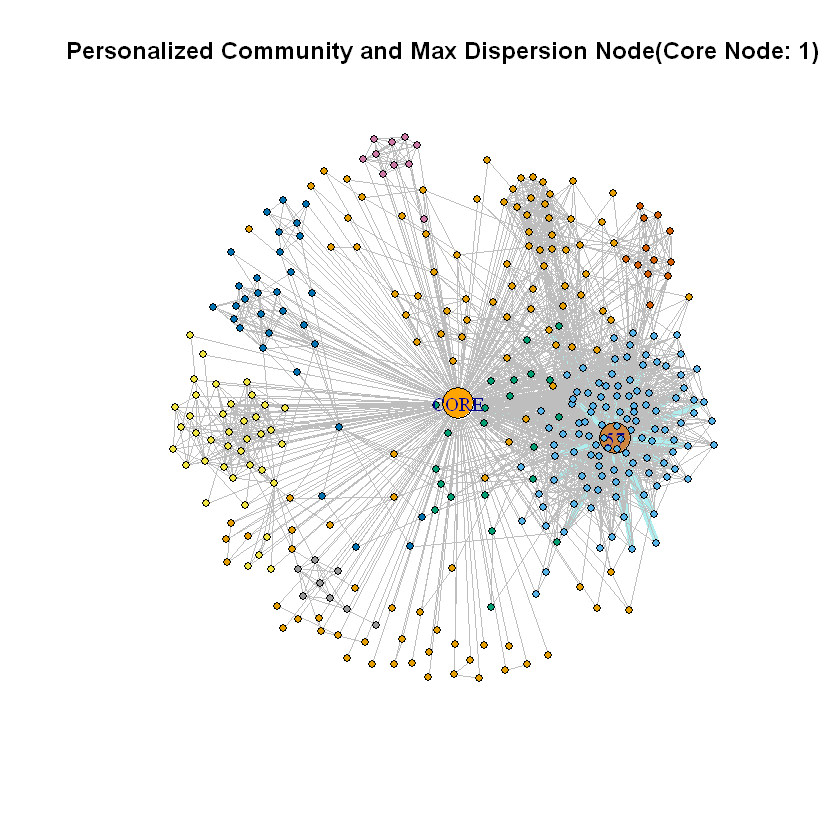

In [26]:
custom_plot(core_node_1,com_1,core_vertex_1,max_disp_vertex_1,title = "Personalized Community and Max Dispersion Node(Core Node: 1)")

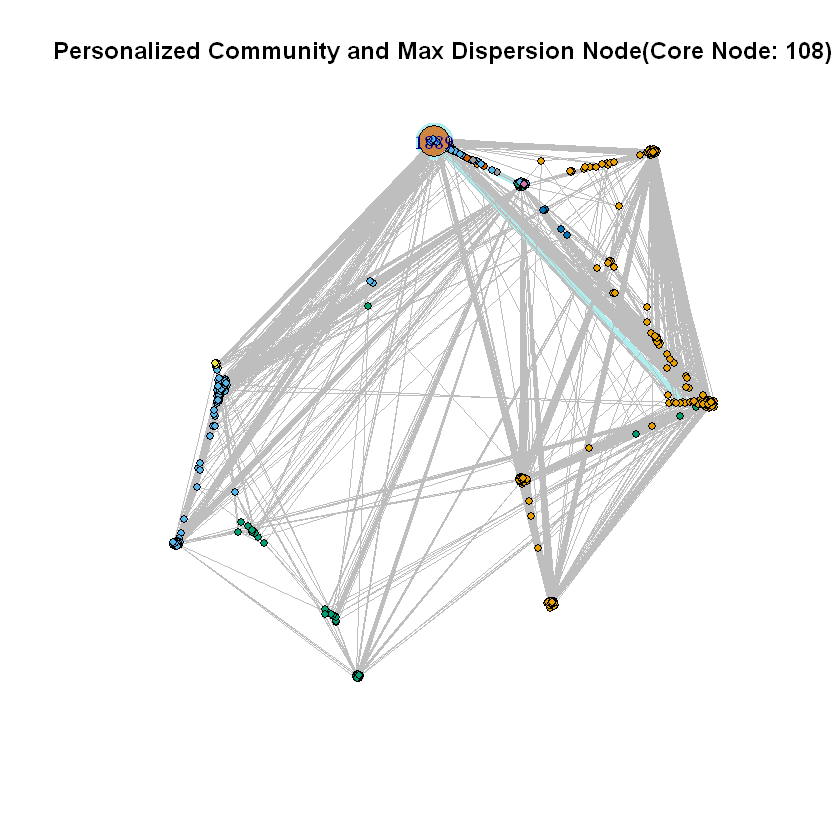

In [27]:
custom_plot(core_node_108,com_108,core_vertex_108,max_disp_vertex_108,title = "Personalized Community and Max Dispersion Node(Core Node: 108)")

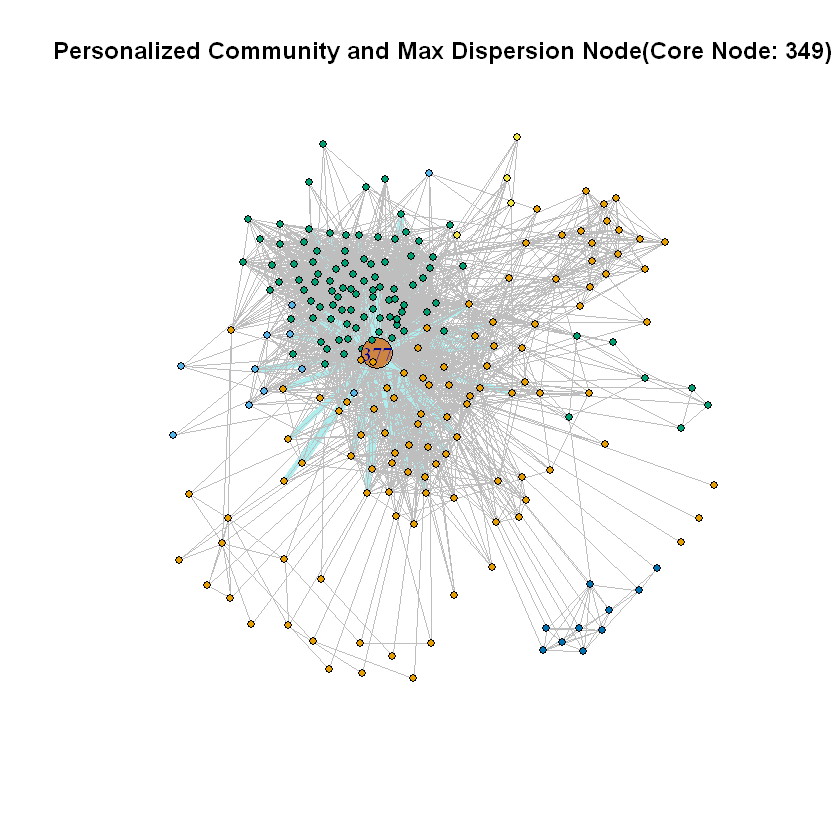

In [28]:
custom_plot(core_node_349,com_349,core_vertex_349,max_disp_vertex_349,title = "Personalized Community and Max Dispersion Node(Core Node: 349)")

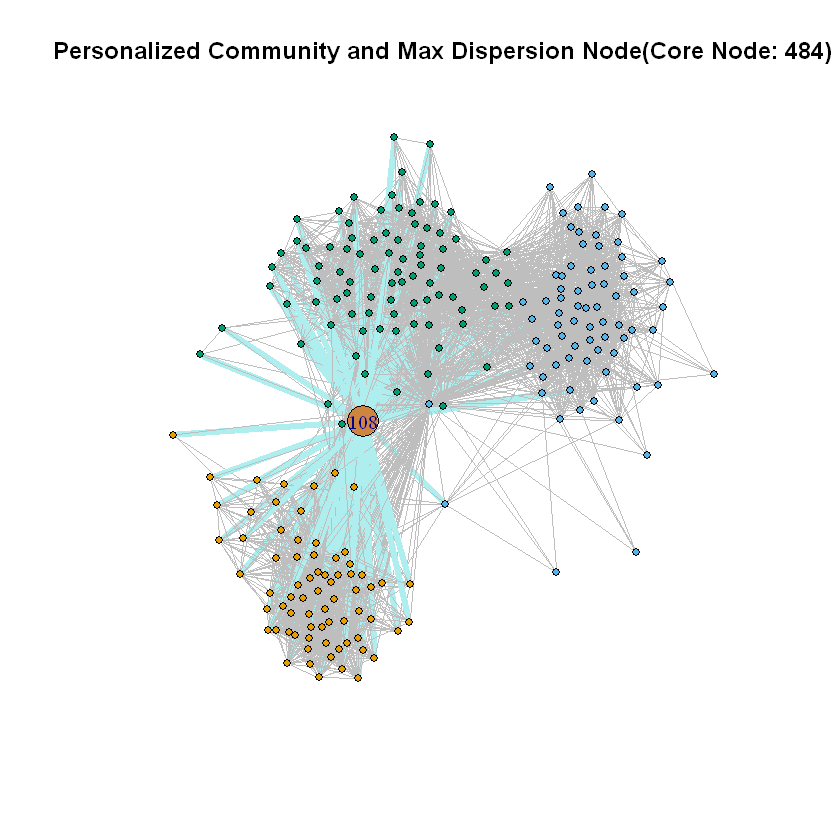

In [29]:
custom_plot(core_node_484,com_484,core_vertex_484,max_disp_vertex_484,title = "Personalized Community and Max Dispersion Node(Core Node: 484)")

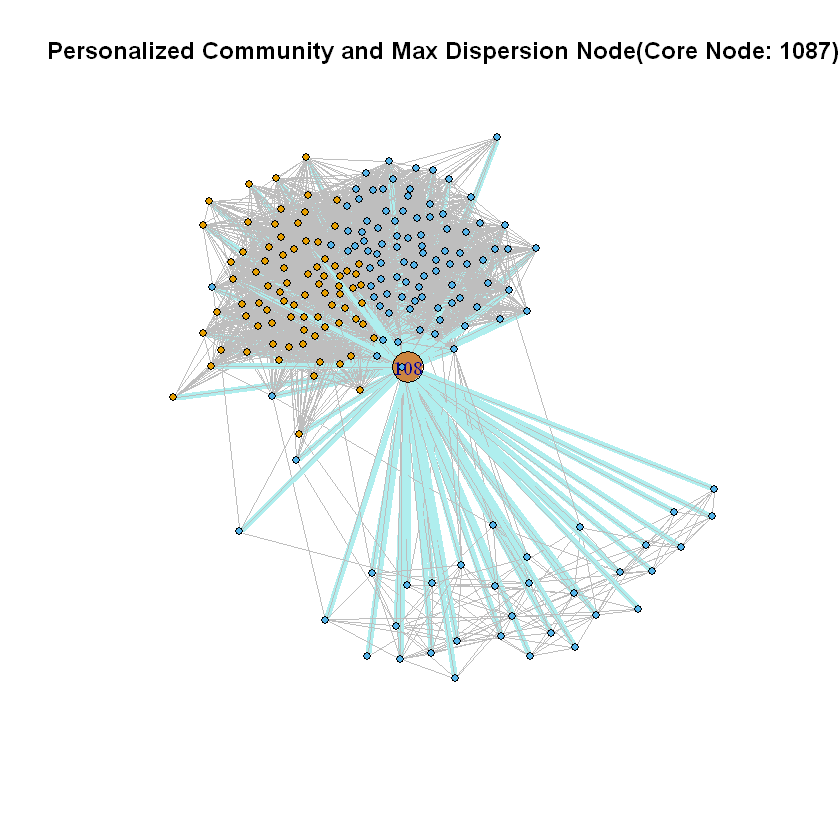

In [30]:
custom_plot(core_node_1087,com_1087,core_vertex_1087,max_disp_vertex_1087,title = "Personalized Community and Max Dispersion Node(Core Node: 1087)")

In [31]:
max_embeddedness_vertex <- function(core_node_g,embeddedness_l){
    # input is embeddedness_l not embeddedness_1
    nodes_wo_core = V(core_node_g)[-core_node_g$core_node_pos]
    return(nodes_wo_core[which.max(embeddedness_l)])
}

In [32]:
max_embed_vertex_1 = max_embeddedness_vertex(core_node_1,embeddedness_1)
max_embed_vertex_108 = max_embeddedness_vertex(core_node_108,embeddedness_108)
max_embed_vertex_349 = max_embeddedness_vertex(core_node_349,embeddedness_349)
max_embed_vertex_484 = max_embeddedness_vertex(core_node_484,embeddedness_484)
max_embed_vertex_1087 = max_embeddedness_vertex(core_node_1087,embeddedness_1087)

In [33]:
print(max_embed_vertex_1)
print(max_embed_vertex_108)
print(max_embed_vertex_349)
print(max_embed_vertex_484)
print(max_embed_vertex_1087)

+ 1/348 vertex, named, from 75cad57:
[1] 57
+ 1/1046 vertex, named, from 75cc0df:
[1] 1889
+ 1/230 vertex, named, from 75cc832:
[1] 377
+ 1/232 vertex, named, from 75ccd14:
[1] 108
+ 1/206 vertex, named, from 75cd1f6:
[1] 108


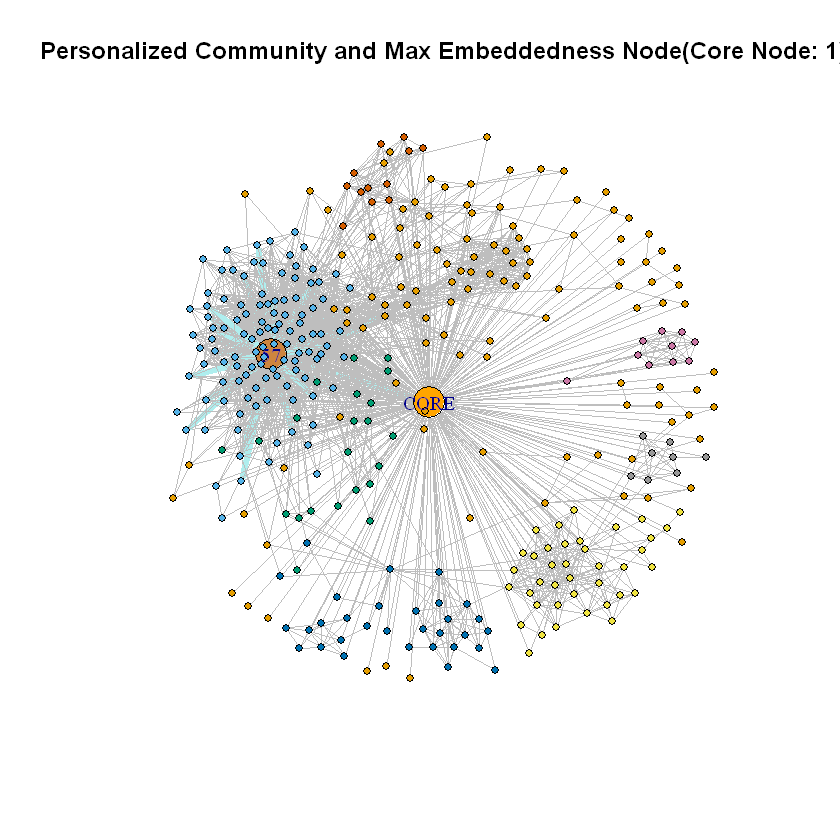

In [34]:
custom_plot(core_node_1,com_1,core_vertex_1,max_embed_vertex_1,title = "Personalized Community and Max Embeddedness Node(Core Node: 1)")

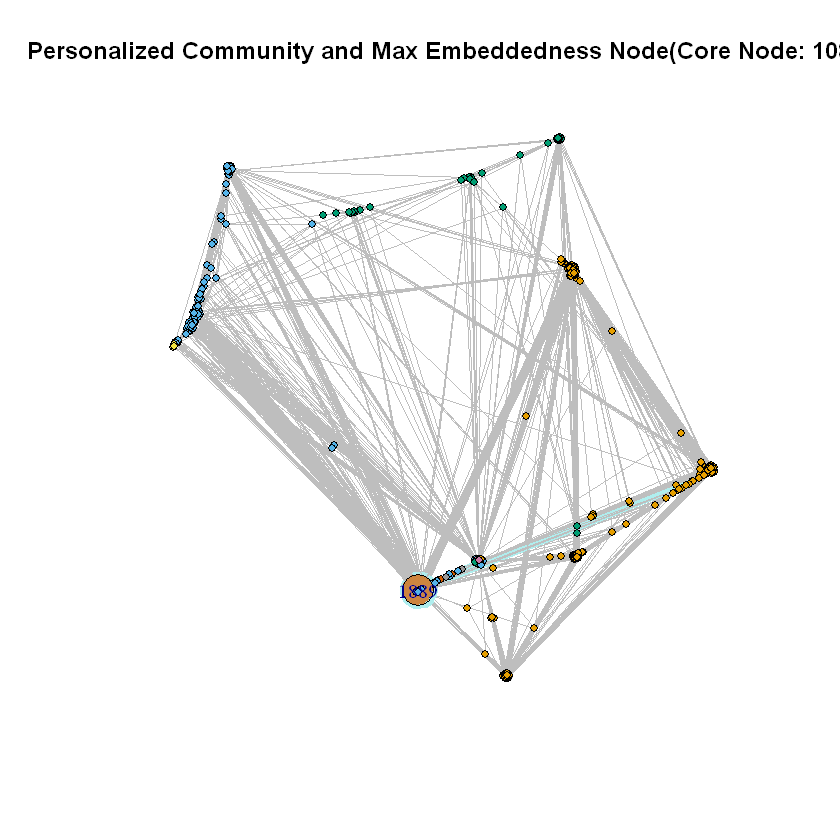

In [35]:
custom_plot(core_node_108,com_108,core_vertex_108,max_embed_vertex_108,title = "Personalized Community and Max Embeddedness Node(Core Node: 108)")

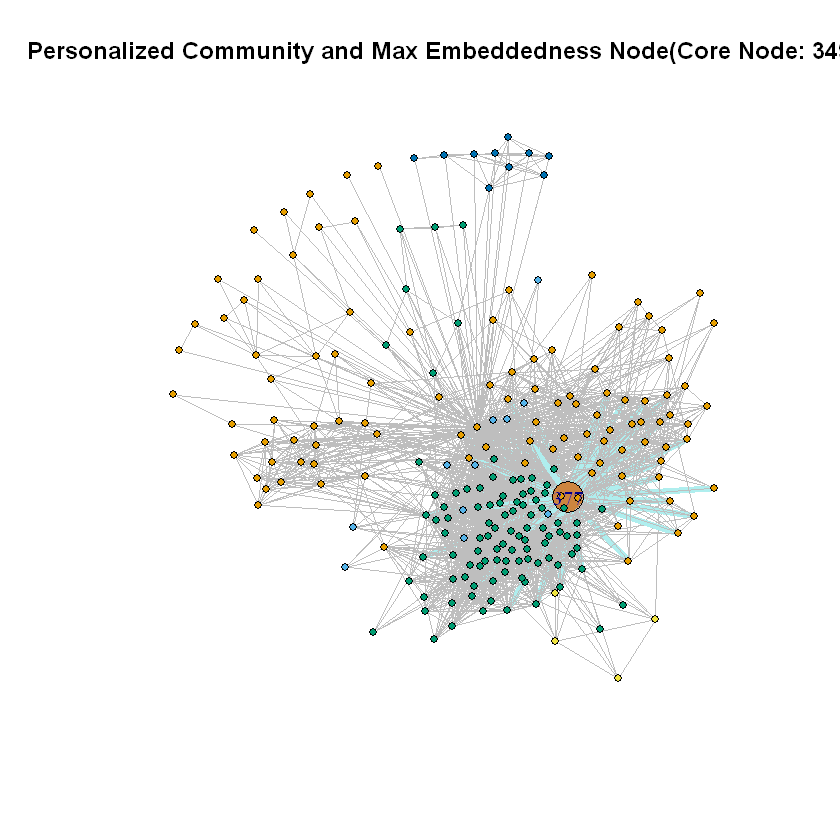

In [36]:
custom_plot(core_node_349,com_349,core_vertex_349,max_embed_vertex_349,title = "Personalized Community and Max Embeddedness Node(Core Node: 349)")

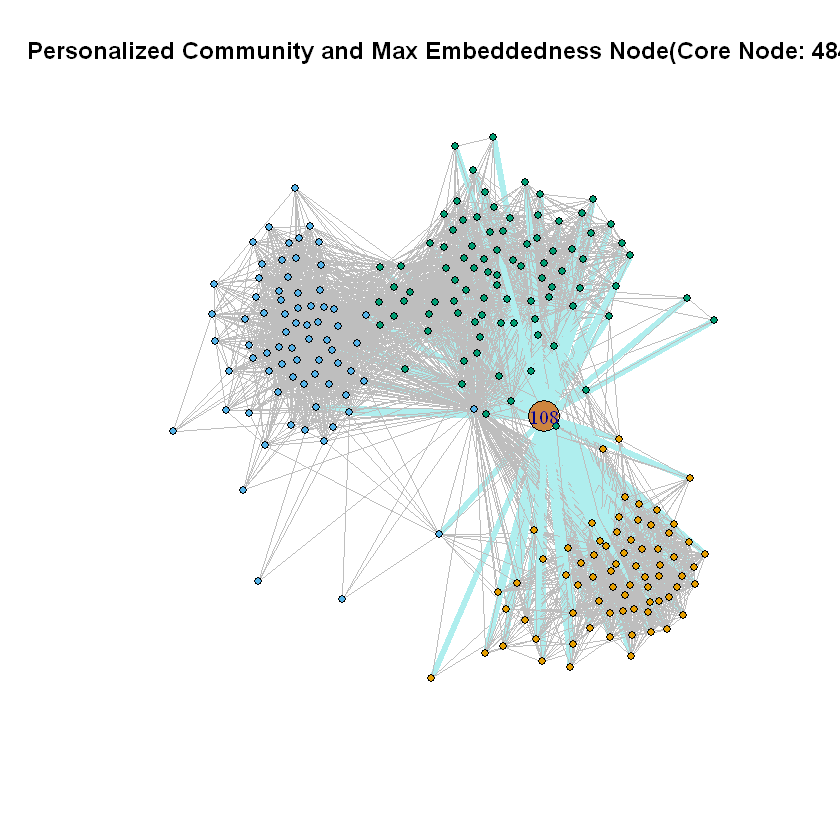

In [37]:
custom_plot(core_node_484,com_484,core_vertex_484,max_embed_vertex_1087,title = "Personalized Community and Max Embeddedness Node(Core Node: 484)")

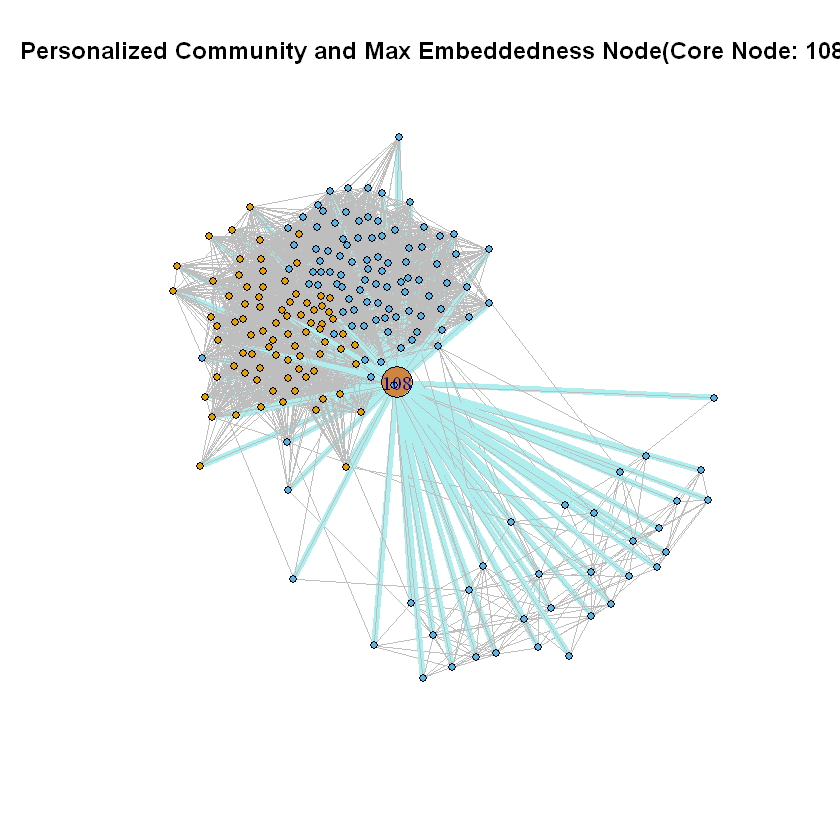

In [38]:
custom_plot(core_node_1087,com_1087,core_vertex_1087,max_disp_vertex_1087,title = "Personalized Community and Max Embeddedness Node(Core Node: 1087)")

In [39]:
max_ratio_vertex <- function(core_node_g, dispersion_l,embeddedness_l){
    # input is dispersion_l not dispersion_1
    nodes_wo_core = V(core_node_g)[-core_node_g$core_node_pos]
    embeddedness_l[which(embeddedness_l == 0)] = NaN
    return(nodes_wo_core[which.max(dispersion_l/embeddedness_l)])
}

In [40]:
max_ratio_vertex_1 = max_ratio_vertex(core_node_1,dispersion_1,embeddedness_1)
max_ratio_vertex_108 = max_ratio_vertex(core_node_108,dispersion_108,embeddedness_108)
max_ratio_vertex_349 = max_ratio_vertex(core_node_349,dispersion_349,embeddedness_349)
max_ratio_vertex_484 = max_ratio_vertex(core_node_484,dispersion_484,embeddedness_484)
max_ratio_vertex_1087 = max_ratio_vertex(core_node_1087,dispersion_1087,embeddedness_1087)

In [41]:
print(max_ratio_vertex_1)
print(max_ratio_vertex_108)
print(max_ratio_vertex_349)
print(max_ratio_vertex_484)
print(max_ratio_vertex_1087)

+ 1/348 vertex, named, from 75cad57:
[1] 26
+ 1/1046 vertex, named, from 75cc0df:
[1] 1889
+ 1/230 vertex, named, from 75cc832:
[1] 377
+ 1/232 vertex, named, from 75ccd14:
[1] 108
+ 1/206 vertex, named, from 75cd1f6:
[1] 108


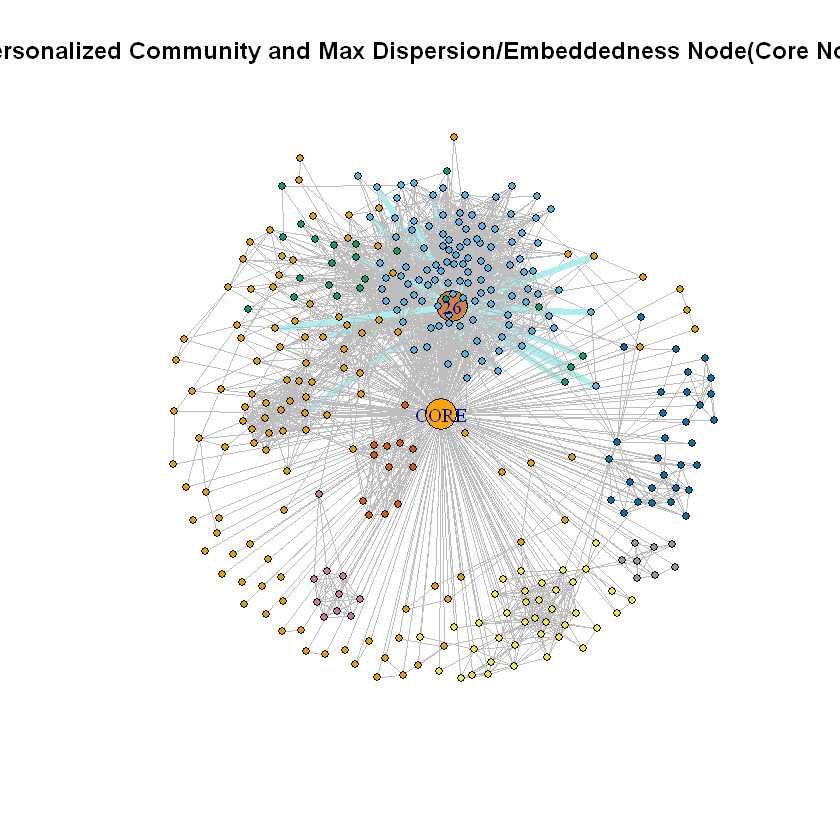

In [42]:
custom_plot(core_node_1,com_1,core_vertex_1,max_ratio_vertex_1,title = "Personalized Community and Max Dispersion/Embeddedness Node(Core Node: 1)")

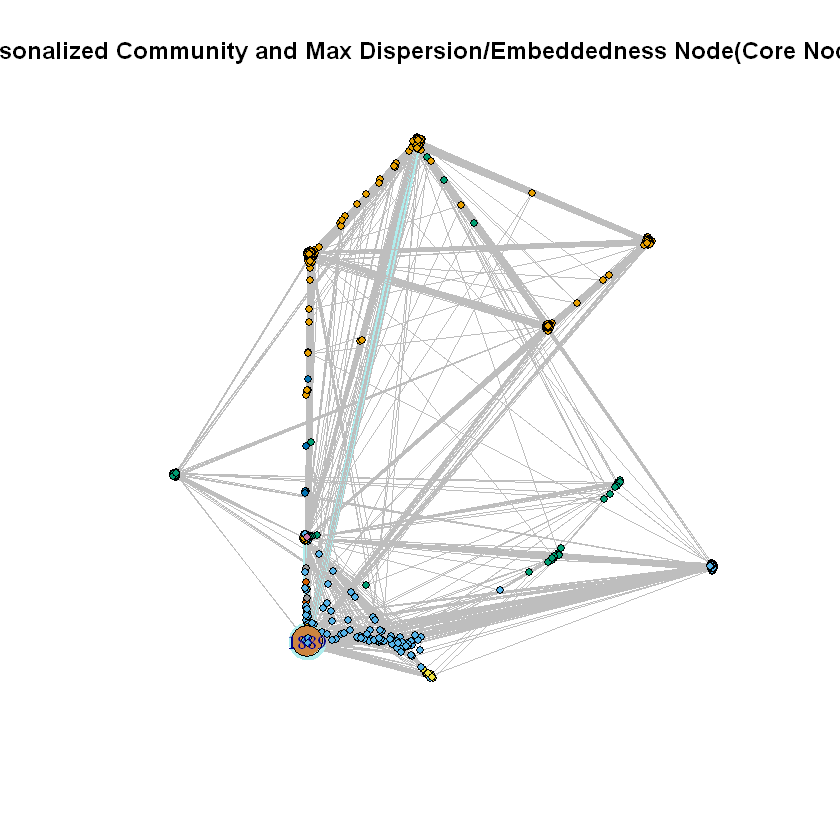

In [43]:
custom_plot(core_node_108,com_108,core_vertex_108,max_ratio_vertex_108,title = "Personalized Community and Max Dispersion/Embeddedness Node(Core Node: 108)")

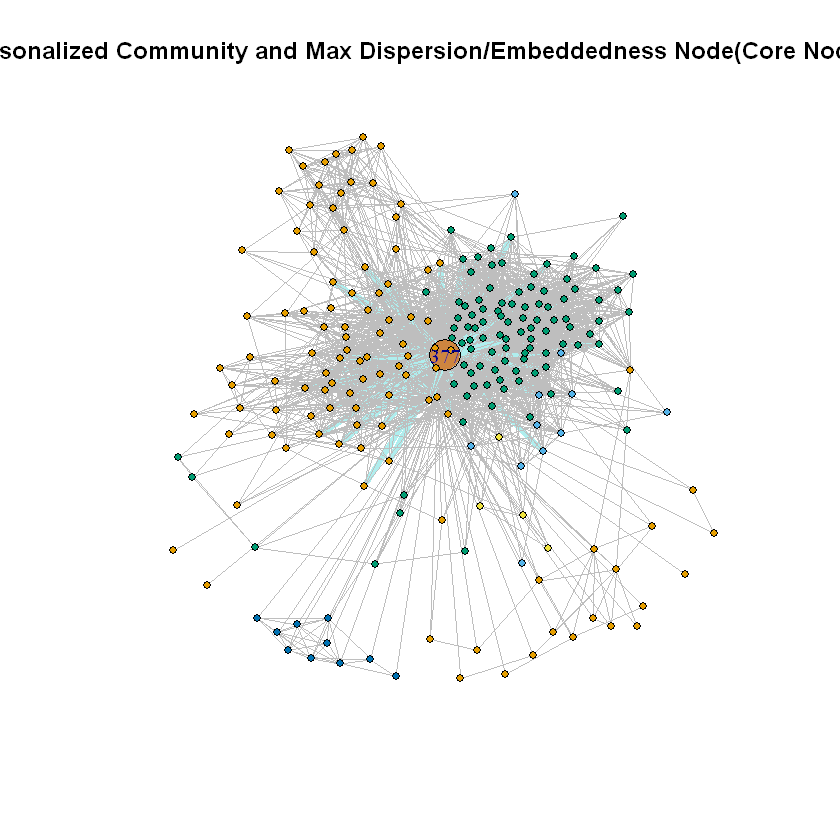

In [44]:
custom_plot(core_node_349,com_349,core_vertex_349,max_ratio_vertex_349,title = "Personalized Community and Max Dispersion/Embeddedness Node(Core Node: 349)")

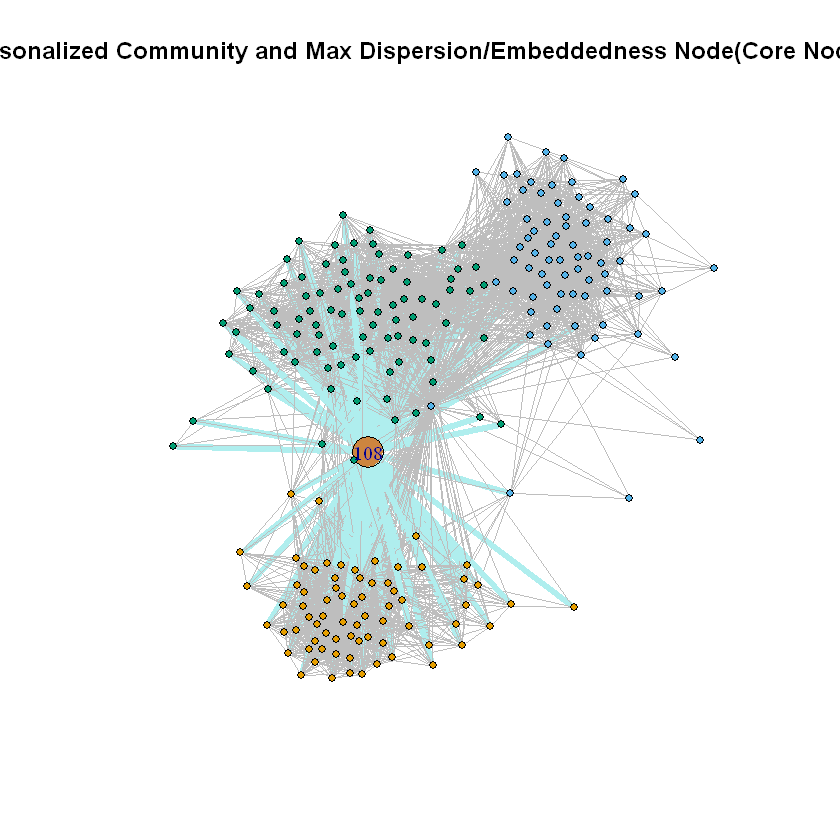

In [45]:
custom_plot(core_node_484,com_484,core_vertex_484,max_ratio_vertex_484,title = "Personalized Community and Max Dispersion/Embeddedness Node(Core Node: 484)")

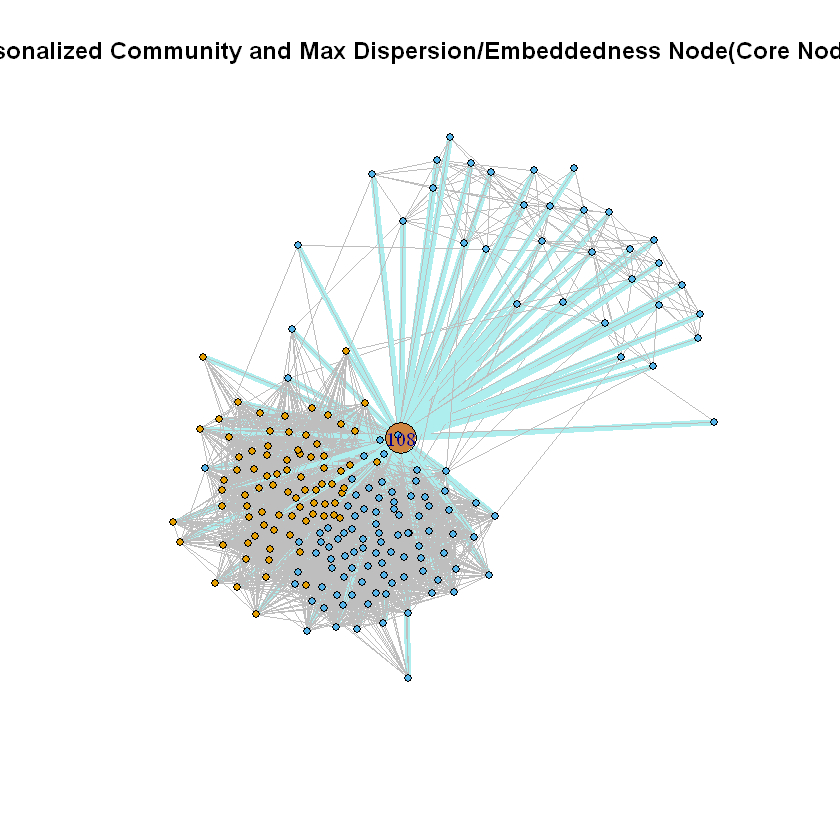

In [46]:
custom_plot(core_node_1087,com_1087,core_vertex_1087,max_ratio_vertex_1087,title = "Personalized Community and Max Dispersion/Embeddedness Node(Core Node: 1087)")

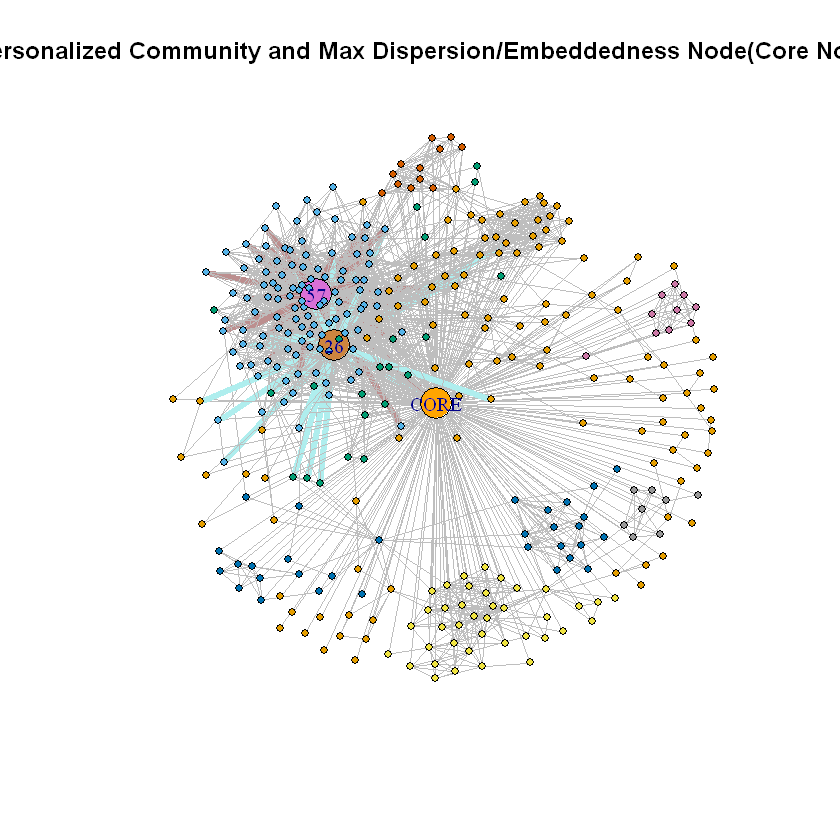

In [47]:
custom_plot(core_node_1,com_1,core_vertex_1,union(max_ratio_vertex_1,max_embed_vertex_1),title = "Personalized Community and Max Dispersion/Embeddedness Node(Core Node: 1)")

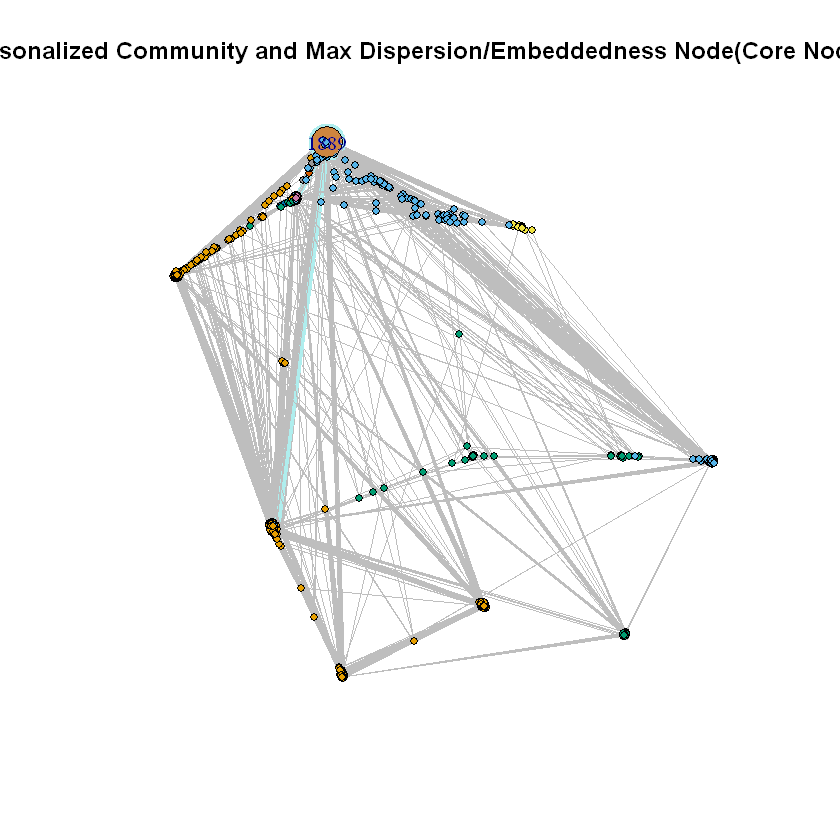

In [48]:
custom_plot(core_node_108,com_108,core_vertex_108,union(max_ratio_vertex_108,max_embed_vertex_108),title = "Personalized Community and Max Dispersion/Embeddedness Node(Core Node: 108)")

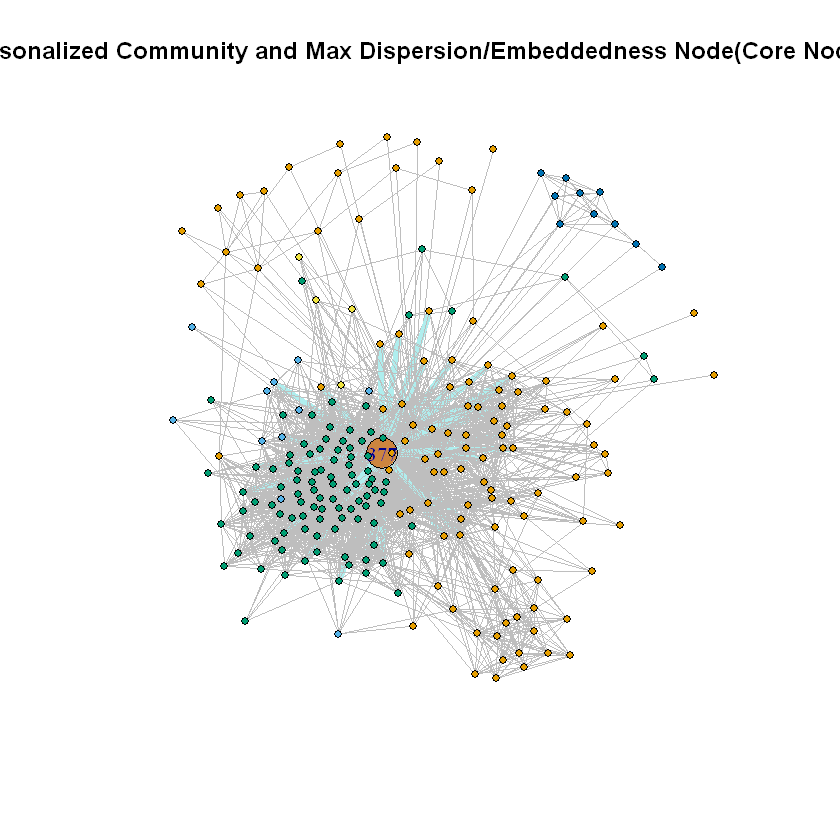

In [49]:
custom_plot(core_node_349,com_349,core_vertex_349,union(max_ratio_vertex_349,max_embed_vertex_349),title = "Personalized Community and Max Dispersion/Embeddedness Node(Core Node: 349)")

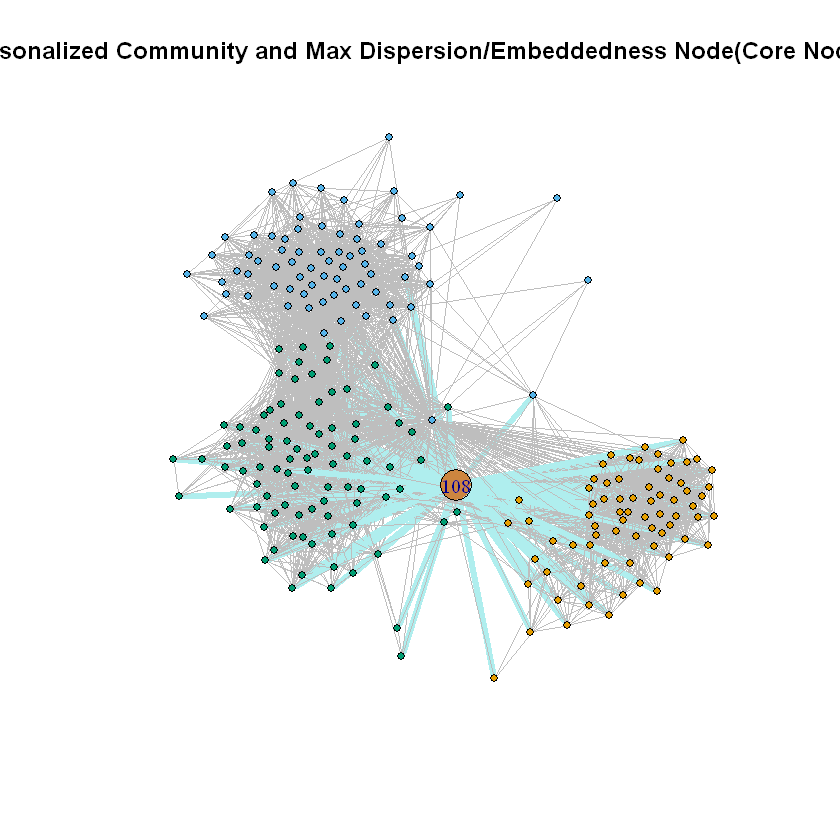

In [50]:
custom_plot(core_node_484,com_484,core_vertex_484,union(max_ratio_vertex_484,max_embed_vertex_484),title = "Personalized Community and Max Dispersion/Embeddedness Node(Core Node: 484)")

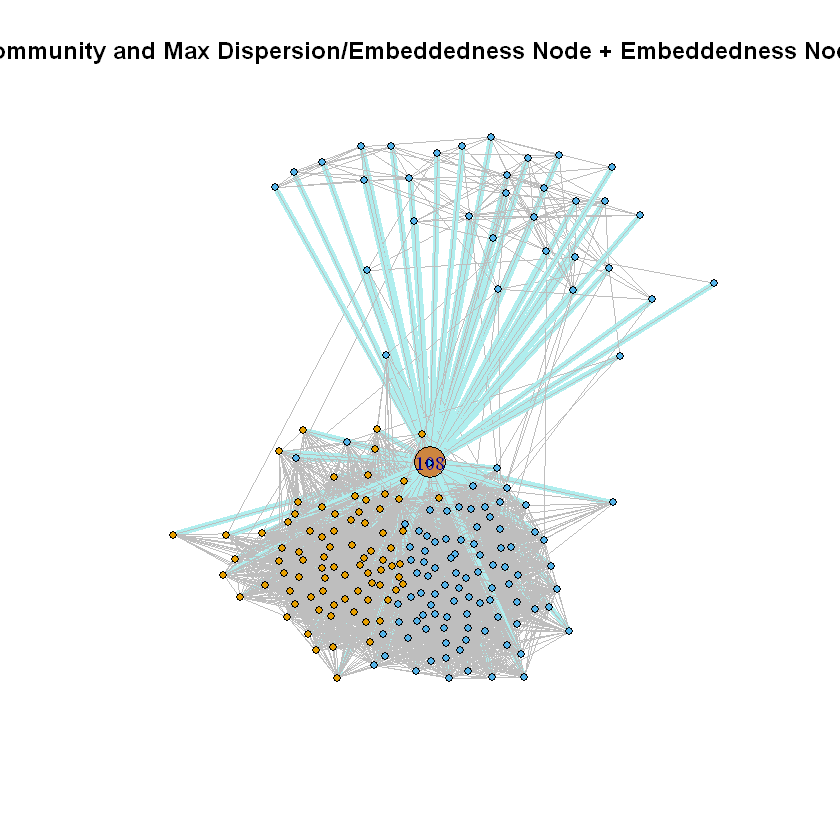

In [51]:
custom_plot(core_node_1087,com_1087,core_vertex_1087,union(max_ratio_vertex_1087,max_embed_vertex_1087),title = "Personalized Community and Max Dispersion/Embeddedness Node + Embeddedness Node(Core Node: 1087)")

In [52]:
union(max_ratio_vertex_1,max_embed_vertex_1)

+ 2/348 vertices, named, from 75cad57:
[1] 26 57